#Theoretical

##1.Can we use Bagging for regression problems?

->Yes, **Bagging (Bootstrap Aggregating)** can definitely be used for **regression problems**.

---

### ✅ What is Bagging?

Bagging is an ensemble technique that:

* Trains multiple models (usually of the same type) on **different random subsets** (with replacement) of the training data.
* Averages their predictions (for regression) or uses majority voting (for classification) to improve performance.

---

### ✅ How Bagging Works for Regression:

* Each base model (e.g., a Decision Tree Regressor) is trained on a bootstrap sample.
* Final prediction is the **average of all base regressors' predictions**.

---

### ✅ Example in Python (Using `BaggingRegressor` from `sklearn`):

```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_boston(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging with Decision Trees
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=10,
    random_state=42
)

# Train model
bagging_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
```

---

### ✅ Benefits of Using Bagging for Regression:

* Reduces **variance**, making predictions more stable.
* Helps prevent **overfitting**, especially with high-variance models like decision trees.
* Works well even when individual models are not very strong.

---

### 🔍 Popular Bagging-Based Regressors:

* **Random Forest Regressor** (bagging of decision trees with feature randomness)
* **BaggingRegressor** in `sklearn`

---



##2.What is the difference between multiple model training and single model training?
->The key difference between **multiple model training** and **single model training** lies in how many models are trained and how their predictions are used. Here's a clear breakdown:

---

### 🔹 1. **Single Model Training**

* **What it is:** You train **one machine learning model** on the entire training dataset.
* **Examples:** Linear Regression, Decision Tree, SVM, etc., trained once.

#### ✅ Pros:

* Simpler to train and interpret.
* Faster and uses less memory.
* Easier to deploy.

#### ❌ Cons:

* May **overfit or underfit** depending on model complexity.
* Can be sensitive to noise or outliers.
* Limited by the model’s inherent strengths/weaknesses.

---

### 🔹 2. **Multiple Model Training (Ensemble Learning)**

* **What it is:** You train **several models**, then combine their predictions.
* **Techniques:**

  * **Bagging** (e.g., Random Forest)
  * **Boosting** (e.g., Gradient Boosting, AdaBoost)
  * **Stacking**
  * **Voting ensembles**

#### ✅ Pros:

* Usually **more accurate and robust** than single models.
* Can **reduce variance** (e.g., Bagging) or **reduce bias** (e.g., Boosting).
* Works well in competitions and real-world systems.

#### ❌ Cons:

* **Complex and computationally expensive**.
* Harder to interpret.
* Slower training and inference.

---

### 🔁 Key Comparison

| Aspect           | Single Model            | Multiple Models (Ensemble)       |
| ---------------- | ----------------------- | -------------------------------- |
| Model Count      | 1                       | Multiple                         |
| Performance      | Depends on model & data | Usually better generalization    |
| Training Time    | Faster                  | Slower                           |
| Interpretability | Easier to interpret     | Harder to interpret              |
| Robustness       | Less robust to noise    | More robust                      |
| Examples         | Linear Regression, SVM  | Random Forest, Gradient Boosting |

---

### 🧠 Summary

* Use **single model training** when you need simplicity, speed, and interpretability.
* Use **multiple model training (ensembles)** when you want **better performance and robustness**, especially for complex tasks.



##3. Explain the concept of feature randomness in Random Forest

->### 🌲 Feature Randomness in Random Forest – Explained

**Random Forest** is an ensemble learning method that combines the predictions of multiple decision trees to improve accuracy and control overfitting.

One of the key reasons Random Forest performs better than a single decision tree is **feature randomness** (also called **feature bagging** or **attribute sampling**).

---

### 🔹 What is Feature Randomness?

In **Random Forest**, when each tree is being constructed:

* At **each split in the tree**, only a **random subset of features** is considered to find the best split.
* This is different from a regular decision tree, which considers **all features** at every split.

---

### 🔹 Why is Feature Randomness Important?

1. **Reduces Correlation Between Trees:**

   * If all trees used the same most predictive features, they’d be highly correlated.
   * Feature randomness makes the trees **diverse**, improving the ensemble's performance.

2. **Improves Generalization:**

   * Diversity in trees helps Random Forest avoid overfitting, especially on noisy datasets.

3. **Increases Model Robustness:**

   * The model does not rely too heavily on a few strong predictors, making it more balanced.

---

### 🔹 Example:

Assume you have a dataset with 10 features: `F1, F2, ..., F10`.

* In a standard decision tree, all 10 features are evaluated at every split.
* In a Random Forest:

  * If using `max_features=3`, then **only 3 randomly chosen features** (e.g., `F2, F7, F9`) are considered at that split.
  * This selection is repeated **independently** at each node in every tree.

---

### 🔧 In `scikit-learn`:

```python
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',  # or 'log2', or an int/fraction
    random_state=42
)
```

* Common choices for `max_features`:

  * `'sqrt'`: square root of total features (default for classification)
  * `'log2'`: log2 of total features
  * A fixed number or float (e.g., `0.5` means 50% of features)

---

### 🧠 Summary:

| Aspect                      | Random Forest (with Feature Randomness)     |
| --------------------------- | ------------------------------------------- |
| Feature selection per split | Random subset of features                   |
| Benefit                     | Reduces correlation, improves accuracy      |
| Common parameter            | `max_features`                              |
| Key idea                    | **Inject randomness to reduce overfitting** |

---



##4.What is OOB (Out-of-Bag) Score?

->### 🧪 What is OOB (Out-of-Bag) Score in Random Forest?

**OOB (Out-of-Bag) Score** is a performance metric used to evaluate **Random Forest** models **without needing a separate validation set**.

---

### 🔹 How It Works:

Random Forest uses **Bagging** (Bootstrap Aggregating), which:

* Trains each tree on a **random sample with replacement** from the training data.
* On average, each tree sees about **63%** of the training samples.
* The remaining **\~37%** of the data (not used in training that tree) is called the **Out-of-Bag data** for that tree.

Each data point is likely to be **out-of-bag** for about **1/3 of the trees**.

---

### 🔹 OOB Prediction:

* For each sample, you use only the trees **where it was not included in training** to predict its output.
* You then compare these OOB predictions with the actual values.

---

### 🔹 OOB Score:

* **For classification**: It’s the **accuracy** of OOB predictions.
* **For regression**: It’s usually the **R² score** (coefficient of determination) based on OOB predictions.

---

### 🔧 In `scikit-learn`:

```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

model.fit(X_train, y_train)
print("OOB Score:", model.oob_score_)
```

> Note: `bootstrap=True` is required for `oob_score` to work (default is `True`).

---

### ✅ Advantages of OOB Score:

| Advantage           | Description                                   |
| ------------------- | --------------------------------------------- |
| Efficient           | No need for a separate validation set         |
| Built-in            | Automatically computed during training        |
| Reliable for tuning | Gives a good estimate of generalization error |

---

### 🧠 Summary:

| Term           | Meaning                                                           |
| -------------- | ----------------------------------------------------------------- |
| OOB Sample     | Data not seen by a particular tree                                |
| OOB Prediction | Prediction made using only trees that didn’t see the sample       |
| OOB Score      | Accuracy (classification) or R² (regression) from OOB predictions |

---



##How can you measure the importance of features in a Random Forest model?

->You can **measure feature importance** in a **Random Forest** model by analyzing how much each feature contributes to reducing impurity or improving model performance.

---

### 🔹 Two Main Methods for Measuring Feature Importance in Random Forest:

---

### ✅ 1. **Mean Decrease in Impurity (MDI)** – *Gini Importance*

* This is the **default method** used in `scikit-learn`.
* When a feature is used to split a node, the impurity (like Gini or MSE) is reduced.
* This **reduction is accumulated** over all trees and all nodes where the feature is used.
* More reduction = more important.

#### 🔧 In `scikit-learn`:

```python
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance scores
importances = model.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
```

---

### ✅ 2. **Mean Decrease in Accuracy (MDA)** – *Permutation Importance*

* This is a **model-agnostic method**.
* Idea: Randomly shuffle one feature’s values and see how much model accuracy drops.
* Bigger drop = more important feature.

#### 🔧 In `scikit-learn`:

```python
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Feature importance based on drop in model score
for i in sorted_idx[::-1]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")
```

---

### 🔍 Comparison:

| Method            | Based On                         | Pros                          | Cons                                    |
| ----------------- | -------------------------------- | ----------------------------- | --------------------------------------- |
| MDI (default)     | Impurity reduction during splits | Fast, built-in                | Biased toward high-cardinality features |
| MDA (Permutation) | Model performance drop           | More accurate, model-agnostic | Slower, needs more computation          |

---

### 📈 Bonus: Visualization

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top features
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Random Forest")
plt.tight_layout()
plt.show()
```

---

### 🧠 Summary

* **MDI (Gini importance):** Fast and default, based on impurity decrease.
* **MDA (Permutation):** Slower but more reliable, based on accuracy drop.
* Choose based on your need for **speed vs interpretability**.



##6.Explain the working principle of a Bagging Classifier

->### 🧠 **Working Principle of a Bagging Classifier (Bootstrap Aggregating Classifier)**

**Bagging** (short for **Bootstrap Aggregating**) is an ensemble learning technique that builds **multiple versions of a classifier** and combines them to produce better performance—especially by reducing **variance** and **overfitting**.

---

### 🔹 How a Bagging Classifier Works – Step-by-Step:

#### 🧩 1. **Bootstrap Sampling**

* From the original training data (of size `N`), create **multiple random subsets** (also of size `N`) by sampling **with replacement**.
* Some points may appear multiple times; others may be excluded in a given subset.

#### 🌳 2. **Train Base Models**

* Train a separate classifier (e.g., Decision Tree) on **each bootstrap sample**.
* Each model learns slightly differently due to data variation.

#### 📊 3. **Aggregate Predictions**

* For **classification**: Use **majority voting** across all classifiers.
* For **regression** (Bagging Regressor): Use **average** of predictions.

#### 🔄 4. **Out-of-Bag (OOB) Evaluation (optional)**

* Each training sample is “out-of-bag” (not used) in \~37% of models.
* You can evaluate model accuracy using only the models where the sample was not included.

---

### 🔧 Example in `scikit-learn` (Classification):

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=10,
    oob_score=True,       # Enable OOB scoring
    random_state=42
)

# Train and predict
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", bagging_clf.oob_score_)
```

---

### ✅ Advantages of Bagging Classifier:

| Benefit                  | Explanation                                  |
| ------------------------ | -------------------------------------------- |
| Reduces variance         | Aggregation smooths out predictions          |
| Handles overfitting      | Especially helpful with high-variance models |
| Robust to noise          | Random sampling reduces impact of outliers   |
| Supports parallelization | Models are trained independently             |

---

### ❌ Limitations:

* Doesn’t reduce **bias** (ineffective if base models are too simple).
* Less effective for **low-variance** models (like linear classifiers).

---

### 📌 Summary Table:

| Step        | Description                                            |
| ----------- | ------------------------------------------------------ |
| Sampling    | Randomly sample with replacement (bootstrap)           |
| Training    | Train each classifier on a different subset            |
| Aggregation | Majority vote (classification) or average (regression) |
| Key Benefit | Reduces **variance** to improve generalization         |

---



##7.How do you evaluate a Bagging Classifier’s performance?

->To **evaluate a Bagging Classifier's performance**, you use the same techniques as for any supervised classification model—measuring how well it predicts on unseen data. However, Bagging has some **unique evaluation options** as well. Here's a complete guide:

---

### ✅ **1. Accuracy on Test/Validation Data**

* Measure the percentage of correctly classified samples.

```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
```

---

### ✅ **2. Confusion Matrix**

* Gives a detailed breakdown of true positives, false positives, etc.

```python
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
```

---

### ✅ **3. Classification Report**

* Includes precision, recall, F1-score, and support for each class.

```python
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```

---

### ✅ **4. Cross-Validation**

* Use k-fold cross-validation to evaluate generalization across different data splits.

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bagging_model, X, y, cv=5)
print("Cross-validation Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean()*100, scores.std()*100))
```

---

### ✅ **5. ROC Curve and AUC (for binary classification)**

* Evaluates the model’s ability to separate classes.

```python
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

probs = bagging_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, _ = roc_curve(y_test, probs)

plt.plot(fpr, tpr, label="AUC = %.2f" % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
```

---

### ✅ **6. Out-of-Bag (OOB) Score (specific to Bagging)**

* Uses "out-of-bag" samples to estimate performance **without needing a validation set**.
* Only works if `oob_score=True` and `bootstrap=True` during model creation.

```python
print("OOB Score:", bagging_model.oob_score_)
```

* This gives a good internal estimate of test accuracy during training.

---

### 🧠 Summary Table

| Metric                    | Use Case                                        |
| ------------------------- | ----------------------------------------------- |
| **Accuracy**              | Overall correctness                             |
| **Confusion Matrix**      | Detailed class-by-class error breakdown         |
| **Classification Report** | Precision, recall, F1 for each class            |
| **Cross-Validation**      | More reliable estimate of model performance     |
| **ROC AUC**               | Performance on imbalanced/binary problems       |
| **OOB Score**             | Built-in validation using unused bootstrap data |

---



##8. How does a Bagging Regressor work?

->### 🧠 How Does a **Bagging Regressor** Work?

A **Bagging Regressor** is an ensemble method that improves the performance of regression models by **reducing variance** through **bootstrap aggregation (bagging)**.

It works by training multiple regressors on random subsets of the data and **averaging their predictions**.

---

### 🔧 Step-by-Step Working of Bagging Regressor:

#### 1. **Bootstrap Sampling**

* Create multiple subsets of the training data by **sampling with replacement** (called **bootstrap samples**).
* Each subset is typically the same size as the original training data.

#### 2. **Train Base Regressors**

* Train a **base regressor** (e.g., Decision Tree Regressor) on **each subset**.
* Due to different samples, each model learns a slightly different function.

#### 3. **Aggregate Predictions**

* For a given input, each regressor gives a prediction.
* The **final output is the average** of all predictions.

$$
\hat{y} = \frac{1}{M} \sum_{i=1}^{M} \hat{y}_i
$$

Where:

* $M$ is the number of base models.
* $\hat{y}_i$ is the prediction from the $i^\text{th}$ model.

---

### 🔧 Code Example (Using `scikit-learn`):

```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize Bagging Regressor
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=10,
    oob_score=True,
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("OOB R² Score:", bagging_regressor.oob_score_)
```

---

### ✅ Advantages of Bagging Regressor:

| Advantage               | Description                                                    |
| ----------------------- | -------------------------------------------------------------- |
| Reduces Variance        | Averaging predictions smooths out noise                        |
| Improves Generalization | Less overfitting than single models                            |
| Handles Non-linearity   | Works well with non-linear base regressors like decision trees |
| Robust to Overfitting   | Especially effective with high-variance models                 |

---

### ❌ Limitations:

| Limitation          | Description                          |
| ------------------- | ------------------------------------ |
| No Bias Reduction   | Does not improve underfitting models |
| Slower Training     | Multiple models are trained          |
| Harder to Interpret | Combined model is less transparent   |

---

### 🧠 Summary Table:

| Step        | Action                                                      |
| ----------- | ----------------------------------------------------------- |
| Sampling    | Draw bootstrap samples from training data                   |
| Training    | Train base regressors independently on each sample          |
| Aggregation | Average their predictions for final output                  |
| Use Case    | Ideal when individual models overfit (e.g., decision trees) |

---



##9.What is the main advantage of ensemble techniques?

->### ✅ **Main Advantage of Ensemble Techniques:**

The **main advantage** of ensemble techniques is that they **combine multiple models to produce a more accurate, robust, and generalizable prediction** than any single model could achieve on its own.

---

### 🔑 **Why Ensembles Work Better:**

1. ### 🧩 **Reduced Variance**

   * **Bagging** methods like **Random Forest** reduce overfitting by averaging multiple high-variance models.
   * This makes predictions more **stable**.

2. ### 🧠 **Reduced Bias**

   * **Boosting** methods like **Gradient Boosting** combine weak models sequentially, correcting errors step by step.
   * Helps reduce **bias**, leading to better learning of complex patterns.

3. ### 🔄 **Improved Generalization**

   * Ensembles tend to generalize better to unseen data by **balancing bias and variance**.

4. ### ⚠️ **Robustness to Noise & Outliers**

   * No single model dominates; so, errors due to noise or overfitting are **diluted** across the ensemble.

5. ### 🔍 **Better Predictive Performance**

   * In practice, ensemble methods consistently outperform individual models in competitions and real-world problems.

---

### 🧪 Example Comparison:

| Model Type           | Accuracy  | Variance | Bias     |
| -------------------- | --------- | -------- | -------- |
| Single Decision Tree | Medium    | High     | Low      |
| Random Forest        | High      | Low      | Low      |
| Gradient Boosting    | Very High | Medium   | Very Low |

---

### 🛠 Common Ensemble Methods:

| Technique    | Combines Models By      | Example Models                       |
| ------------ | ----------------------- | ------------------------------------ |
| **Bagging**  | Parallel averaging      | Random Forest, Bagging Classifier    |
| **Boosting** | Sequential correction   | AdaBoost, Gradient Boosting, XGBoost |
| **Stacking** | Layered learners        | Stacked Generalization               |
| **Voting**   | Majority/average voting | Voting Classifier                    |

---

### 📌 Summary:

> **Ensemble techniques improve performance by combining the strengths of multiple models while canceling out their weaknesses.**

They help create **strong learners from weak ones** — this is their core power.

---



##10.What is the main challenge of ensemble methods?

->### ⚠️ Main Challenge of Ensemble Methods

While ensemble methods offer **high accuracy and robustness**, their **main challenge** is **increased complexity** — both in terms of **computation** and **interpretability**.

---

### 🔑 Key Challenges in Detail:

---

### 1. 🧠 **Lack of Interpretability**

* **Hard to understand and explain** the final prediction.
* Unlike simple models (e.g., linear regression), ensembles (like Random Forests or Gradient Boosting) act like black boxes.
* This is especially problematic in domains like **medicine**, **finance**, or **law**, where model transparency is critical.

---

### 2. 🖥️ **Computational Cost**

* Ensemble methods train **multiple models**, often **dozens or hundreds**.
* More training time and **greater memory usage**.
* Can be **slow at inference** (prediction) too, especially with large models.

---

### 3. 🔄 **Complexity in Implementation & Tuning**

* More **hyperparameters** to tune (e.g., number of trees, learning rate, max depth).
* **Boosting** algorithms like XGBoost or CatBoost require careful tuning to prevent overfitting or underfitting.

---

### 4. 🧪 **Overfitting Risk (in Boosting)**

* Although ensembles are designed to reduce overfitting, **Boosting** (e.g., Gradient Boosting) can **overfit if not regularized properly**.
* Especially true with small or noisy datasets.

---

### 5. 🚀 **Deployment & Maintenance**

* Harder to **deploy in production**, especially in real-time systems.
* Large model size and inference time can be problematic for mobile or embedded devices.

---

### ✅ Quick Summary Table:

| Challenge             | Explanation                                      |
| --------------------- | ------------------------------------------------ |
| **Interpretability**  | Hard to explain decisions made by ensembles      |
| **Computation**       | Slower training/inference due to multiple models |
| **Tuning Complexity** | Requires careful hyperparameter tuning           |
| **Overfitting Risk**  | Especially in boosting methods                   |
| **Deployment**        | Heavy models are difficult to scale or deploy    |

---

### 🧠 Final Thought:

> **Ensembles trade off simplicity for performance.**
> You get **higher accuracy**, but you often **lose transparency and efficiency**.

---



##11.Explain the key idea behind ensemble techniques

->### 🧠 Key Idea Behind Ensemble Techniques

The **key idea** behind ensemble techniques is:

> ✅ **"Combine multiple weak or diverse models to build a strong overall model that performs better than any individual one."**

---

### 🔧 Why This Works:

Just like asking multiple experts can give you a more reliable decision than asking just one, ensemble methods:

* **Aggregate diverse opinions (models)**
* **Reduce individual errors**
* **Balance bias and variance**

---

### 📊 Analogy:

> Imagine guessing the number of jellybeans in a jar.
>
> * One person might be way off.
> * But if you average the guesses of 100 people, the result is surprisingly accurate.
>   That’s the power of **aggregation** — and that’s the core of ensemble learning.

---

### 🔄 How Ensembles Work:

1. **Train multiple models** — can be same type (e.g., decision trees) or different types (e.g., SVM + Logistic + KNN).
2. **Combine their outputs**:

   * **Classification**: Use majority voting.
   * **Regression**: Take the average.
3. Result: A more **accurate and stable** prediction.

---

### 🔍 Common Ensemble Strategies:

| Technique    | Key Idea                                                                | Example            |
| ------------ | ----------------------------------------------------------------------- | ------------------ |
| **Bagging**  | Train on random subsets, average output                                 | Random Forest      |
| **Boosting** | Train sequentially, focus on errors                                     | XGBoost, AdaBoost  |
| **Stacking** | Combine different models' outputs using a meta-model                    | Stacked Classifier |
| **Voting**   | Combine different classifiers’ predictions via majority or average vote | VotingClassifier   |

---

### ✅ Benefits:

* Improves **accuracy**
* Reduces **variance** (Bagging)
* Reduces **bias** (Boosting)
* Increases **robustness** and **generalization**

---

### 🧠 Summary:

> **Ensemble = Many Weak Models + Smart Combination = One Strong Model**

It's one of the most powerful strategies in machine learning — widely used in both academia and industry.

---



##12.What is a Random Forest Classifier?

->### 🌲 What is a **Random Forest Classifier**?

A **Random Forest Classifier** is an **ensemble machine learning model** that combines the predictions of multiple **decision trees** to classify data more accurately and robustly.

It uses the principles of **Bagging (Bootstrap Aggregating)** and **Feature Randomness** to reduce overfitting and improve generalization.

---

### 🔧 How It Works – Step-by-Step:

#### 1. **Bootstrap Sampling (Bagging)**

* Create many different subsets of the training data by sampling **with replacement**.
* Each tree is trained on a **different bootstrap sample**.

#### 2. **Train Decision Trees**

* Each tree is trained independently on its sample.
* At every split in the tree, only a **random subset of features** is considered (this is **feature randomness**).

#### 3. **Majority Voting**

* For classification, each tree votes for a class.
* The **final prediction** is the **majority vote** across all trees.

---

### 📌 Characteristics of Random Forest:

| Feature      | Description                              |
| ------------ | ---------------------------------------- |
| Type         | Ensemble, Supervised Learning            |
| Base Learner | Decision Tree                            |
| Aggregation  | Majority voting (classification)         |
| Handles      | Classification & Regression tasks        |
| Key Strength | High accuracy, robustness to overfitting |

---

### ✅ Advantages:

* ✔️ **Reduces overfitting** (compared to single decision trees)
* ✔️ **Works well with high-dimensional data**
* ✔️ **Handles missing values and unbalanced data**
* ✔️ **Automatically ranks feature importance**
* ✔️ **Parallelizable** (each tree can be trained independently)

---

### ❌ Disadvantages:

* ❌ Slower to train and predict (due to many trees)
* ❌ Less interpretable than a single decision tree
* ❌ Memory-intensive for large datasets

---

### 🔧 Example in Python (Using `scikit-learn`):

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
```

---

### 🧠 Summary:

> A **Random Forest Classifier** is a powerful, flexible, and widely used model that builds an ensemble of decision trees to make reliable predictions.

It’s often a go-to model when you want high performance with minimal tuning.

---



##13.What are the main types of ensemble techniques?

->### 🧠 Main Types of Ensemble Techniques in Machine Learning

Ensemble techniques combine **multiple models** to improve overall performance, accuracy, and robustness. The **main types** are:

---

## 🔹 1. **Bagging (Bootstrap Aggregating)**

### 🔧 Key Idea:

* Train **multiple models in parallel** on different **bootstrap samples** of the data.
* Combine their predictions using **voting (classification)** or **averaging (regression)**.

### 📌 Examples:

* **Random Forest** (Bagging + Decision Trees)
* **BaggingClassifier / BaggingRegressor**

### ✅ Benefits:

* Reduces **variance**
* Helps prevent **overfitting**

---

## 🔹 2. **Boosting**

### 🔧 Key Idea:

* Train **models sequentially**, each trying to **correct the errors** of the previous one.
* Weights are updated to **focus on harder-to-predict samples**.

### 📌 Examples:

* **AdaBoost**
* **Gradient Boosting** (GBM, XGBoost, LightGBM, CatBoost)

### ✅ Benefits:

* Reduces **bias**
* Very **accurate and powerful**, often used in competitions

---

## 🔹 3. **Stacking (Stacked Generalization)**

### 🔧 Key Idea:

* Train multiple **diverse models** and then use a **meta-model** to combine their predictions.
* The base models’ outputs become inputs to the final model.

### 📌 Examples:

* A stack of Logistic Regression, SVM, and Decision Tree with a meta-model like XGBoost.

### ✅ Benefits:

* Leverages the **strengths of different algorithms**
* Often achieves **better performance** than individual models

---

## 🔹 4. **Voting**

### 🔧 Key Idea:

* Combine predictions from **different classifiers** by:

  * **Majority vote** (hard voting)
  * **Average of predicted probabilities** (soft voting)

### 📌 Examples:

* Combine SVM, KNN, and Logistic Regression using `VotingClassifier` in `sklearn`.

### ✅ Benefits:

* Simple to implement
* Works well if base models are diverse and fairly accurate

---

## 🔹 5. **Blending** (Variant of Stacking)

### 🔧 Key Idea:

* Similar to stacking, but uses a **validation set** (not cross-validation) to train the meta-model.
* Slightly simpler but less data-efficient than stacking.

---

### 📊 Summary Table

| Ensemble Type | Trained Models | Combination Method      | Main Goal          | Example               |
| ------------- | -------------- | ----------------------- | ------------------ | --------------------- |
| **Bagging**   | Parallel       | Majority vote / average | Reduce variance    | Random Forest         |
| **Boosting**  | Sequential     | Weighted sum            | Reduce bias        | XGBoost, AdaBoost     |
| **Stacking**  | Parallel       | Meta-learner            | Leverage diversity | Logistic + SVM + Tree |
| **Voting**    | Parallel       | Vote / probability avg  | Simplicity         | VotingClassifier      |
| **Blending**  | Parallel       | Meta-model (on val set) | Simpler stacking   | Custom ensemble       |

---

### 🧠 Final Thought:

> **Different ensemble methods solve different problems** — bagging fights overfitting, boosting fixes underfitting, stacking boosts power by mixing models.



##14.What is ensemble learning in machine learning?

->### 🧠 What is Ensemble Learning in Machine Learning?

**Ensemble learning** is a machine learning technique that **combines multiple models (often called "base learners")** to solve a problem and improve predictive performance compared to any individual model.

---

### 🔑 **Core Idea:**

> **“Many weak models together can form a strong model.”**

By aggregating the predictions of several models, ensemble learning:

* Increases **accuracy**
* Reduces **overfitting** and **variance**
* Improves **generalization** on unseen data

---

### 📊 Real-World Analogy:

Think of it like **taking multiple expert opinions** before making a decision. One expert may be wrong, but if most of them agree, the final decision is more likely to be correct.

---

### 🧱 Types of Ensemble Learning Techniques:

| Technique    | Key Concept                                                                    | Example Algorithms                   |
| ------------ | ------------------------------------------------------------------------------ | ------------------------------------ |
| **Bagging**  | Train multiple models in parallel on random subsets of data (with replacement) | Random Forest                        |
| **Boosting** | Train models sequentially, each focusing on previous errors                    | AdaBoost, Gradient Boosting, XGBoost |
| **Stacking** | Combine predictions from different models using a meta-model                   | Stacked Generalization               |
| **Voting**   | Aggregate predictions by majority (classification) or average (regression)     | Voting Classifier                    |

---

### ✅ Benefits of Ensemble Learning:

| Benefit                | Description                                 |
| ---------------------- | ------------------------------------------- |
| 🎯 **Better Accuracy** | Outperforms individual models in most cases |
| 🛡️ **Robustness**     | Less sensitive to noise and overfitting     |
| 🔄 **Generalization**  | Performs better on unseen data              |
| 🔍 **Versatility**     | Can combine different types of models       |

---

### ❌ Challenges:

| Challenge              | Explanation                                       |
| ---------------------- | ------------------------------------------------- |
| 🧠 Less Interpretable  | Hard to explain decisions of many combined models |
| 🖥️ Computational Cost | Requires more time and memory                     |
| 🔧 More Tuning Needed  | More hyperparameters and architecture decisions   |

---

### 🧠 Summary:

> **Ensemble learning = smarter decisions by combining multiple learners.**

It is widely used in practice and **dominates machine learning competitions** (like Kaggle), often being the key to winning solutions.

---



##15.When should we avoid using ensemble methods?

->Great question. While **ensemble methods** are powerful, they are **not always the best choice**. Here’s a breakdown of situations where you might want to **avoid using ensemble methods**:

---

### 🚫 When to Avoid Ensemble Methods:

---

### 1. 🧠 **You Need Model Interpretability**

* If you need a model that is **simple, explainable, and easy to understand** (e.g., in healthcare, finance, or legal decisions), ensemble methods (like Random Forest, XGBoost) may be too **opaque** or **hard to interpret**.
* ✅ Prefer: **Logistic Regression**, **Decision Trees**, or **Rule-based models**

---

### 2. ⚡ **You Need Fast Training or Prediction**

* Ensemble methods (especially boosting) can be **computationally expensive**.
* If you’re working with **limited hardware**, **real-time predictions**, or **very large datasets**, ensembles might be **too slow or resource-heavy**.
* ✅ Prefer: **Naïve Bayes**, **Linear Models**, or small **Decision Trees**

---

### 3. 📉 **Your Base Model Already Performs Well**

* If a **simple model gives high accuracy** and generalizes well, adding ensemble complexity may **not yield significant gains**—but will increase training cost and code complexity.
* ✅ Tip: Always benchmark against a **baseline model** first.

---

### 4. 🔍 **Small or Very Clean Datasets**

* Ensemble methods shine when data is **noisy**, **complex**, or has **high variance**.
* On a **small or very clean dataset**, a single well-tuned model might outperform or match an ensemble.
* ✅ Prefer: A single **decision tree**, **SVM**, or **logistic regression**.

---

### 5. 🧪 **Experimental or Educational Scenarios**

* If you are learning or demonstrating machine learning concepts (like overfitting, bias-variance trade-off), ensembles may **hide the fundamental behavior** of individual models.
* ✅ Prefer: Simple models for clarity

---

### 6. ⚙️ **Deployment Constraints**

* Ensembles often require **more memory**, **larger file sizes**, and **slower prediction times**.
* This can be a problem in environments like **mobile apps**, **embedded systems**, or **edge devices**.

---

### ✅ Summary Table:

| Avoid Ensembles When...                | Because...                                    |
| -------------------------------------- | --------------------------------------------- |
| You need interpretability              | Ensembles are black-box models                |
| You need speed or have hardware limits | Ensembles are computationally expensive       |
| A simple model performs well           | Ensemble adds complexity with minimal benefit |
| The dataset is small or clean          | Overkill; simpler models may be sufficient    |
| You’re learning basic ML concepts      | Ensembles obscure core learning behaviors     |
| You need lightweight deployment        | Ensemble models are heavier and slower        |

---

### 🧠 Final Tip:

> **Start simple. Use ensembles only when you need more performance.**



##16. How does Bagging help in reducing overfitting?

->### 🎯 How Does **Bagging Help Reduce Overfitting?**

**Bagging** (Bootstrap Aggregating) helps reduce **overfitting** by lowering the **variance** of high-variance models—especially decision trees.

---

### 🔍 Overfitting Problem Recap:

* Overfitting occurs when a model **memorizes noise or small fluctuations** in the training data, rather than learning the true underlying patterns.
* Models like **decision trees** are highly flexible and prone to overfitting.

---

### ✅ How Bagging Solves This:

#### 🔹 1. **Bootstrap Sampling (Random Subsets)**

* Bagging trains each model on a **random sample of the data (with replacement)**.
* This introduces **diversity** among the models, because each one sees a **slightly different dataset**.

#### 🔹 2. **Training Multiple Models (Independent Learners)**

* Bagging builds **multiple models in parallel**.
* Each one may overfit **its own training subset**, but in **different ways**.

#### 🔹 3. **Aggregation of Predictions**

* For classification: use **majority voting**
* For regression: use **averaging**

👉 **Averaging smooths out the “spiky” predictions** of individual overfitted models.

> 🔑 The ensemble is less sensitive to the noise or outliers that any one model may overfit.

---

### 📊 Visual Intuition:

| Model Type                   | Prediction Behavior                                     |
| ---------------------------- | ------------------------------------------------------- |
| Single Decision Tree         | May create deep, complex splits                         |
| Bagged Trees (Random Forest) | Combines many diverse trees → more stable, less overfit |

---

### 🧪 Example: Decision Tree vs Random Forest

| Metric            | Single Decision Tree | Bagging (Random Forest) |
| ----------------- | -------------------- | ----------------------- |
| Training Accuracy | Very High (overfits) | High                    |
| Test Accuracy     | Lower                | Higher (less overfit)   |
| Variance          | High                 | Reduced                 |

---

### 🧠 Summary:

> **Bagging reduces overfitting by lowering variance through model averaging.**

| Technique | Reduces Overfitting? | How?                                      |
| --------- | -------------------- | ----------------------------------------- |
| Bagging   | ✅ Yes                | Aggregates diverse overfit models         |
| Boosting  | ⚠️ Sometimes         | Focuses on bias, can overfit if unchecked |

---



##17. Why is Random Forest better than a single Decision Tree?

->### 🌲 Why is **Random Forest** Better Than a Single **Decision Tree**?

A **Random Forest** is usually better than a single **Decision Tree** because it corrects the biggest weakness of decision trees: **high variance and overfitting**.

---

### 🔍 Key Reasons:

---

### ✅ 1. **Reduces Overfitting**

* **Decision Trees** are prone to **overfitting**, especially on noisy or complex datasets.
* **Random Forest** builds **many trees** and combines their results, making the final model **more generalizable**.

> ➤ Random Forest averages out the errors and variance from individual trees.

---

### ✅ 2. **Increases Accuracy**

* Random Forest often achieves **higher test accuracy** because it's more robust and stable.
* It captures more reliable patterns without being overly influenced by noise.

---

### ✅ 3. **Reduces Variance**

* A single tree might perform very differently with different data splits.
* Random Forest reduces this **variance** by combining the output of many trees trained on different bootstrap samples.

---

### ✅ 4. **Handles Feature Importance**

* Random Forest gives you a measure of **feature importance**, helping you understand which inputs are most influential.
* This is not naturally available in a single decision tree.

---

### ✅ 5. **Robust to Noise and Outliers**

* Outliers can significantly affect a single tree.
* In a Random Forest, **outliers affect only some trees**, not the entire ensemble.

---

### ✅ 6. **Better Generalization**

* Decision Trees can memorize training data (high training accuracy, low test accuracy).
* Random Forest uses **averaging (or voting)** to generalize better to unseen data.

---

### 📊 Quick Comparison:

| Feature                  | Decision Tree             | Random Forest          |
| ------------------------ | ------------------------- | ---------------------- |
| **Overfitting Risk**     | High                      | Low                    |
| **Accuracy**             | Medium                    | High                   |
| **Variance**             | High                      | Reduced                |
| **Bias**                 | Low                       | Slightly higher        |
| **Interpretability**     | Easy to interpret         | Harder to interpret    |
| **Prediction Stability** | Sensitive to data changes | Stable across datasets |
| **Handles Noise**        | Poorly                    | Robust                 |

---

### 🧠 Summary:

> **Random Forest = Many Trees + Bootstrapping + Feature Randomness = Strong, Stable Model**

It combines the strengths of many weak learners (trees) to form a **powerful, less overfit, and more accurate model**.

---



##18.What is the role of bootstrap sampling in Bagging?

->### 🧪 What is the Role of **Bootstrap Sampling** in Bagging?

**Bootstrap sampling** is a core component of **Bagging (Bootstrap Aggregating)** — it plays a crucial role in making the ensemble diverse and effective.

---

### 🧾 Definition:

**Bootstrap sampling** is the process of creating **random subsets** of the training data by **sampling with replacement**.

* Each subset (called a **bootstrap sample**) has the **same size** as the original dataset.
* Because of replacement, some samples appear **multiple times**, and others may be **left out**.

---

### 🎯 Role in Bagging:

| 🔍 Purpose                   | 🧠 Explanation                                                                                                                                             |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✅ **Introduces Diversity**   | Each model in the ensemble sees a **different training dataset**, so it learns different patterns.                                                         |
| ✅ **Reduces Variance**       | The randomness from bootstrap sampling causes the individual models to vary; averaging them **smooths out fluctuations**.                                  |
| ✅ **Prevents Overfitting**   | Because each model overfits **differently**, their combined prediction is more **generalizable**.                                                          |
| ✅ **Enables OOB Evaluation** | \~37% of data points are **out-of-bag** (not included in a sample), which can be used to estimate model performance **without a separate validation set**. |

---

### 🔧 Example in Python (Bootstrapping a dataset):

```python
import numpy as np
from sklearn.utils import resample

# Original dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Bootstrap sample
X_sample, y_sample = resample(X, y, replace=True, n_samples=5, random_state=42)

print("Original X:", X)
print("Bootstrap Sample X:", X_sample)
```

---

### 📊 Summary Table:

| Aspect                 | With Bootstrap Sampling | Without Bootstrap Sampling |
| ---------------------- | ----------------------- | -------------------------- |
| Model Diversity        | High                    | Low                        |
| Variance Reduction     | Yes                     | Less effective             |
| Overfitting Protection | Strong                  | Weaker                     |
| OOB Score Available    | Yes                     | No                         |

---

### 🧠 Final Thought:

> **Bootstrap sampling** is what gives Bagging its strength: diversity.
> By making each model see a slightly different version of the data, Bagging creates a strong, stable ensemble.



##19.What are some real-world applications of ensemble techniques?

->### 🌍 Real-World Applications of Ensemble Techniques

Ensemble methods are widely used in real-world machine learning tasks because they provide **high accuracy, robustness**, and **generalization**. Here are some common domains where ensembles shine:

---

### 1. 🏦 **Finance**

* **Credit scoring**: Predict loan default risk more accurately.
* **Fraud detection**: Detect suspicious transactions using ensembles like Random Forests or XGBoost.
* **Stock market prediction**: Combine weak models for better forecasting.

---

### 2. 🏥 **Healthcare**

* **Disease diagnosis**: Classify diseases (e.g., cancer detection from images or patient data) using ensemble models like Gradient Boosting.
* **Medical image analysis**: Segment and detect abnormalities using stacked CNN ensembles.
* **Patient risk prediction**: Predict ICU admission or readmission using ensemble decision trees.

---

### 3. 🎯 **Marketing and Sales**

* **Customer churn prediction**: Use Random Forests or Gradient Boosting to identify which customers are likely to leave.
* **Recommendation systems**: Blend multiple algorithms for better product recommendations (used in e-commerce platforms).
* **Sales forecasting**: Combine regressors for demand prediction.

---

### 4. 📱 **Text and Language Processing**

* **Spam detection**: Combine Naive Bayes, Logistic Regression, and SVM using Voting or Stacking.
* **Sentiment analysis**: Boosting models like XGBoost often perform well on text classification.
* **Chatbots and NLP tasks**: Ensemble transformers or LSTM-based models for better understanding.

---

### 5. 🛡️ **Cybersecurity**

* **Intrusion detection systems**: Use ensemble methods to classify network activity as normal or malicious.
* **Malware classification**: Detect and classify different types of malware.

---

### 6. 📷 **Computer Vision**

* **Image classification**: Combine CNNs or decision trees for more robust predictions.
* **Face recognition**: Ensemble deep learning models for identity verification.
* **Object detection**: Use ensemble bounding box predictors in real-time applications (e.g., autonomous driving).

---

### 7. 🚗 **Autonomous Vehicles**

* **Sensor fusion**: Ensemble models process LIDAR, camera, and radar data.
* **Path planning and decision-making**: Combine multiple models to reduce risk of error.

---

### 8. 🧪 **Scientific Research**

* **Bioinformatics**: Predict gene expression or protein folding.
* **Climate modeling**: Combine various predictive models for more accurate forecasting.
* **Drug discovery**: Use ensembles to predict molecule activity or toxicity.

---

### 9. 🧠 **Kaggle Competitions and ML Challenges**

* Most winning solutions involve:

  * **Stacking** multiple models
  * **Blending** tree-based models and neural nets
  * **Averaging** predictions from hundreds of models

---

### 🧠 Summary

| Domain          | Application Example                      | Ensemble Methods Used             |
| --------------- | ---------------------------------------- | --------------------------------- |
| Finance         | Credit scoring, fraud detection          | Random Forest, XGBoost            |
| Healthcare      | Diagnosis, image classification          | Gradient Boosting, Stacking       |
| Marketing       | Churn prediction, recommendation systems | Voting, Bagging, Blending         |
| NLP             | Sentiment analysis, spam filtering       | Voting, Boosting, Stacking        |
| Cybersecurity   | Intrusion/malware detection              | Random Forest, AdaBoost           |
| Vision          | Face recognition, object detection       | CNN + ensemble, Gradient Boosting |
| Autonomous Cars | Path planning, sensor fusion             | Ensemble CNNs, Stacking           |

---



##20.What is the difference between Bagging and Boosting?

->### 🔍 Difference Between **Bagging** and **Boosting**

Both **Bagging** and **Boosting** are ensemble learning techniques that improve model performance by combining multiple learners — but they do it in **very different ways**.

---

## 📊 Side-by-Side Comparison:

| Aspect                   | **Bagging**                                    | **Boosting**                                                 |
| ------------------------ | ---------------------------------------------- | ------------------------------------------------------------ |
| 📌 **Goal**              | Reduce **variance** (overfitting)              | Reduce **bias** (underfitting)                               |
| 🔁 **Model Training**    | Models trained **in parallel**                 | Models trained **sequentially**                              |
| 🔀 **Sampling**          | Uses **bootstrap sampling** (with replacement) | No sampling; each model focuses on previous errors           |
| 🎯 **Focus**             | Each model learns **independently**            | Each new model corrects the **mistakes** of the previous one |
| 🧠 **Model Type**        | All models are given **equal weight**          | Later models are given **more weight**                       |
| 🛡️ **Overfitting Risk** | Lower (especially with high-variance models)   | Higher if not tuned properly                                 |
| ⚡ **Training Time**      | Faster (parallelizable)                        | Slower (must run sequentially)                               |
| 📈 **Performance**       | Good baseline model                            | Often achieves **state-of-the-art** performance              |
| 📊 **Examples**          | Random Forest, BaggingClassifier               | AdaBoost, Gradient Boosting, XGBoost                         |

---

### 🧠 Intuition:

* **Bagging** = "Train many independent learners on random data and average their predictions."
* **Boosting** = "Train a sequence of learners, where each tries to fix the errors of the one before it."

---

### 🧪 Code Illustration (Scikit-learn):

**Bagging:**

```python
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
```

**Boosting:**

```python
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
```

---

### 🧠 Summary in One Line:

> ✅ **Bagging** reduces variance by averaging many overfit models.
> ✅ **Boosting** reduces bias by focusing on errors and building a strong model step-by-step.

---




#Practical

In [4]:
#21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load the sample dataset (Iris)
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator (Decision Tree)
base_model = DecisionTreeClassifier()

# Define the Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [5]:
#22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load a sample regression dataset
X, y = load_diabetes(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base regressor (Decision Tree)
base_regressor = DecisionTreeRegressor()

# Create the Bagging Regressor (Ensemble Learning)
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=10,
    random_state=42
)

# Train the ensemble model
bagging_regressor.fit(X_train, y_train)

# Make predictions on test set
y_pred = bagging_regressor.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [6]:
#23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print(feature_importance_df)



                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          concavity error    0.005816


In [7]:
#24.Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_preds)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)

# Print and compare results
print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", rf_mse)


Decision Tree MSE: 0.5280096503174904
Random Forest MSE: 0.25650512920799395


In [8]:
#25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data (optional for comparison, not needed for OOB itself)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest with OOB enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train on training data
rf_model.fit(X_train, y_train)

# Print the OOB score
print("Out-of-Bag (OOB) Score:", rf_model.oob_score_)


Out-of-Bag (OOB) Score: 0.9547738693467337


In [9]:
#26.Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator (Support Vector Classifier)
svm = SVC(probability=True, kernel='rbf', random_state=42)

# Create Bagging Classifier with SVM as base estimator
bagging_model = BaggingClassifier(
    estimator=svm,
    n_estimators=10,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier with SVM Accuracy:", accuracy)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [10]:
#27.Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different tree counts to test
tree_counts = [1, 5, 10, 50, 100, 200]
accuracies = []

# Train and evaluate for each tree count
for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n}: Accuracy = {acc:.4f}")


n_estimators = 1: Accuracy = 0.9474
n_estimators = 5: Accuracy = 0.9649
n_estimators = 10: Accuracy = 0.9649
n_estimators = 50: Accuracy = 0.9708
n_estimators = 100: Accuracy = 0.9708
n_estimators = 200: Accuracy = 0.9708


In [11]:
#28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset (binary classification)
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimator
base_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Define Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict probabilities for ROC AUC
y_proba = bagging_model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score (Bagging + Logistic Regression):", auc_score)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Feature Importances:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


/tmp/ipython-input-12-267366187.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


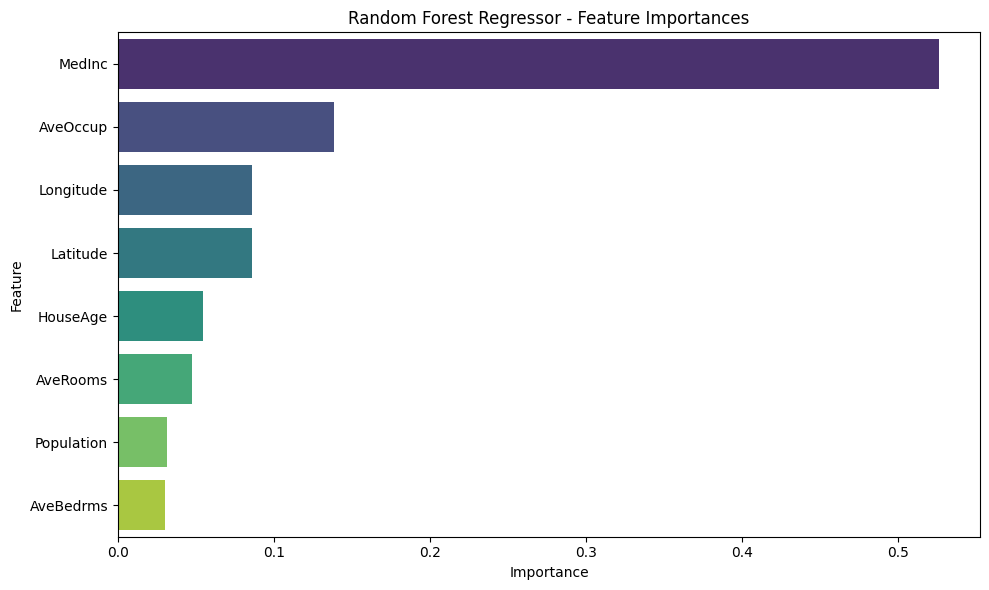

In [12]:
#29.Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
feature_names = X.columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Optional: plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Regressor - Feature Importances')
plt.tight_layout()
plt.show()


In [13]:
#30.Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Bagging Classifier (with Decision Tree base)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)

# 2️⃣ Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print comparison
print(f"Bagging Classifier Accuracy:       {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [14]:
#31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Test Set Accuracy with Best Model:", accuracy)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Test Set Accuracy with Best Model: 0.9707602339181286


In [15]:
#32.Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of estimators to test
n_estimators_list = [1, 5, 10, 50, 100, 200]
mse_scores = []

# Train and evaluate BaggingRegressor for each value of n_estimators
for n in n_estimators_list:
    model = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators = {n}: MSE = {mse:.4f}")

# Optional: Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='--')
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Performance of Bagging Regressor with Varying Estimators")
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#33.Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Identify misclassified samples
misclassified_indices = (y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Create DataFrame for analysis
misclassified_df = pd.DataFrame(misclassified_samples, columns=feature_names)
misclassified_df['True Label'] = [target_names[i] for i in true_labels]
misclassified_df['Predicted Label'] = [target_names[i] for i in predicted_labels]

# Show misclassified samples
print("\nMisclassified Samples:")
print(misclassified_df.head())


In [16]:
#34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Single Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)

# 2️⃣ Bagging Classifier using Decision Tree as base estimator
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)

# 📊 Compare Results
print(f"Single Decision Tree Accuracy: {tree_accuracy:.4f}")
print(f"Bagging Classifier Accuracy:   {bagging_accuracy:.4f}")



TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#35.Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
#36.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
]

# Define final estimator
final_estimator = LogisticRegression(max_iter=1000)

# Build stacking classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5
)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)

# Fit and evaluate individual models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Compare accuracies
print(f"Decision Tree Accuracy:    {dt_accuracy:.4f}")
print(f"SVM Accuracy:              {svm_accuracy:.4f}")
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")


In [17]:
#37.Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 5 features
print("Top 5 Most Important Features:")
print(importance_df.head())


Top 5 Most Important Features:
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


In [18]:
#38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train Bagging Classifier
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Evaluate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

max_depth = 1: Accuracy = 0.9591
max_depth = 2: Accuracy = 0.9532
max_depth = 3: Accuracy = 0.9708
max_depth = 5: Accuracy = 0.9649
max_depth = 10: Accuracy = 0.9708
max_depth = 15: Accuracy = 0.9708
max_depth = 20: Accuracy = 0.9708
max_depth = 30: Accuracy = 0.9708
max_depth = None: Accuracy = 0.9708


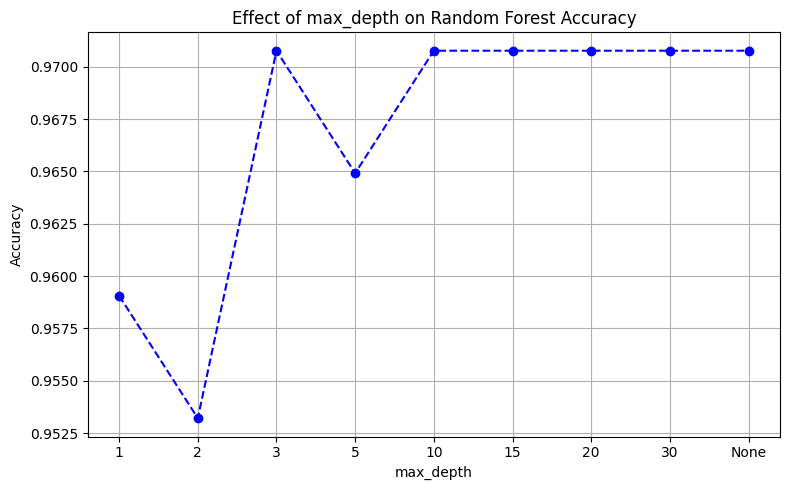

In [19]:
#39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different max_depth values
depths = [1, 2, 3, 5, 10, 15, 20, 30, None]
accuracies = []

for depth in depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth = {depth}: Accuracy = {acc:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
depth_labels = [str(d) if d is not None else "None" for d in depths]
plt.plot(depth_labels, accuracies, marker='o', linestyle='--', color='blue')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#40Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base Estimator 1: Decision Tree Regressor
bagging_tree = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)
bagging_tree.fit(X_train, y_train)
y_pred_tree = bagging_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Base Estimator 2: K-Neighbors Regressor
bagging_knn = BaggingRegressor(
    base_estimator=KNeighborsRegressor(),
    n_estimators=100,
    random_state=42
)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print results
print(f"Bagging Regressor (Decision Tree) MSE: {mse_tree:.4f}")
print(f"Bagging Regressor (KNeighbors)   MSE: {mse_knn:.4f}")


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#41.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict class probabilities
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability of class 1 (benign)

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)

# Print result
print(f"Random Forest Classifier ROC-AUC Score: {roc_auc:.4f}")


In [ ]:
#42.Train a Bagging Classifier and evaluate its performance using cross-validatio.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Define Bagging Classifier with Decision Tree base
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Evaluate using 5-fold cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))


In [ ]:
#43.Train a Random Forest Classifier and plot the Precision-Recall curves
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall pairs and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define final estimator
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Build stacking classifier
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5
)

# Train stacking model
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_preds)

# Train and evaluate individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# Print results
print(f"Logistic Regression Accuracy:     {lr_accuracy:.4f}")
print(f"Random Forest Accuracy:           {rf_accuracy:.4f}")
print(f"Stacking Classifier Accuracy:     {stacking_accuracy:.4f}")


In [ ]:
#45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different bootstrap sample sizes (as a fraction of training data)
max_samples_list = [0.3, 0.5, 0.7, 1.0]
mse_scores = []

# Train and evaluate models
for max_samples in max_samples_list:
    model = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=max_samples,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples = {max_samples:.1f}: MSE = {mse:.4f}")

# Plot MSE vs max_samples
plt.figure(figsize=(8, 5))
plt.plot(max_samples_list, mse_scores, marker='o', linestyle='--', color='green')
plt.xlabel("max_samples (fraction of training data)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance vs Bootstrap Sample Size")
plt.grid(True)
plt.tight_layout()
plt.show()
